In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import random

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train = np.dstack([X_train]*3)
X_test = np.dstack([X_test]*3)
X_train.shape, X_test.shape

((60000, 28, 84), (10000, 28, 84))

In [6]:
X_train = X_train.reshape(-1, 28, 28, 3)
X_test = X_test.reshape(-1, 28, 28, 3)
X_train.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [9]:
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
#train_x = preprocess_input(x)
X_train.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [12]:
model = Sequential()

# Layer 1
model.add(Conv2D(input_shape=(48,48,3),filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Layer 2
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Layer 3
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Layer 4
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))

# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))

# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))

# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Layer 5
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))

# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))

# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))

# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Layer 6
model.add(Flatten())

model.add(Dense(units=100,activation='relu'))

model.add(Dense(units=100,activation='relu'))

model.add(Dense(units=10,activation='softmax'))


optim = Adam(learning_rate=0.001)
model.compile(optimizer=optim,loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                  

In [14]:
checkpoint = ModelCheckpoint('best.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             save_freq=1)

early = EarlyStopping(monitor='val_accuracy',
                       min_delta=0,
                       patience=20,
                       verbose=1,
                       mode='auto')

In [15]:
history = model.fit(X_train,y_train,
                    epochs=5,batch_size=64,
                    verbose=True,
                    validation_data=(X_test,y_test),
                    callbacks=[checkpoint,early])

Epoch 1/5
938/938 [==============================] - 32s 25ms/step - loss: 0.2161 - accuracy: 0.9371 - val_loss: 0.0609 - val_accuracy: 0.9796
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0378 - val_accuracy: 0.9889
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0432 - accuracy: 0.9876 - val_loss: 0.0598 - val_accuracy: 0.9826
Epoch 4/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0403 - accuracy: 0.9886 - val_loss: 0.0448 - val_accuracy: 0.9863
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.0410 - val_accuracy: 0.9880


Train accuracy: 0.9906333088874817
Validation accuracy: 0.9879999756813049
Train loss: 0.03269459307193756
Validation loss: 0.0409964919090271


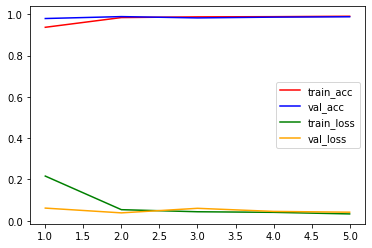

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'red',label='train_acc')
plt.plot(epochs,val_acc,'blue',label='val_acc')
plt.plot(epochs,loss,'green',label='train_loss')
plt.plot(epochs,val_loss,'orange',label='val_loss')
plt.legend()

print(f'Train accuracy: {acc[-1]}')
print(f'Validation accuracy: {val_acc[-1]}')
print(f'Train loss: {loss[-1]}')
print(f'Validation loss: {val_loss[-1]}')

In [26]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[3.7008563e-11, 1.7104650e-05, 6.5069541e-09, 3.6454715e-09,
        3.7409603e-08, 1.1444056e-10, 2.8854254e-11, 9.9997985e-01,
        4.5819765e-10, 2.9895359e-06],
       [4.3247919e-06, 5.3082160e-05, 9.9990106e-01, 1.2073813e-06,
        8.8879652e-08, 5.1973434e-08, 1.2650978e-06, 1.0697365e-06,
        3.7778053e-05, 5.2992149e-08],
       [2.6205864e-11, 1.0000000e+00, 1.6065994e-10, 8.0026866e-14,
        1.3075208e-12, 4.2290792e-11, 6.2939975e-10, 2.7148676e-11,
        2.3953393e-09, 5.5365526e-12],
       [9.9974996e-01, 7.1551476e-08, 5.2698789e-07, 1.9259053e-06,
        4.1466524e-07, 2.2561389e-07, 2.1078722e-05, 2.2149175e-08,
        2.2305742e-04, 2.6625132e-06],
       [8.8700894e-08, 2.6296009e-08, 8.0481941e-09, 1.2237343e-08,
        9.9906892e-01, 4.2127937e-09, 1.1610540e-06, 1.1550902e-06,
        3.1548082e-06, 9.2552346e-04]], dtype=float32)

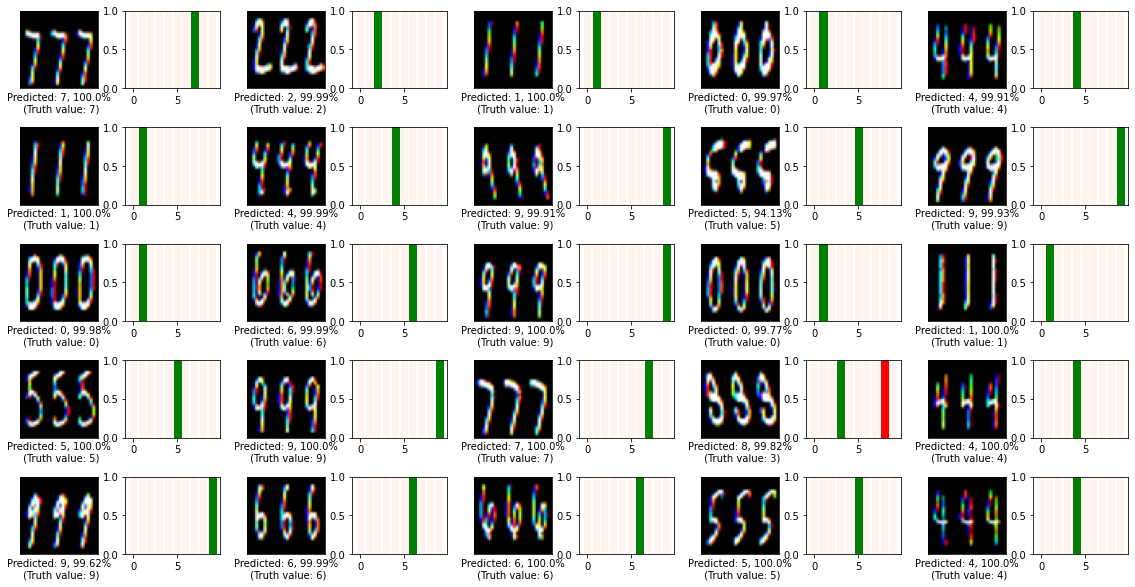

In [34]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    pred,truth,img = np.argmax(y_pred[i]),np.argmax(y_test[i]),X_test[i].reshape(48,48,3)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.astype('int32'))
    plt.xlabel(f"Predicted: {pred}, {round(100*np.max(y_pred[i]),2)}%\n (Truth value: {truth})")

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    if pred == 0: pred = 1
    if truth == 0: truth = 1
    thisplot=plt.bar(range(10), pred, color='seashell')
    plt.ylim([0,1])

    thisplot[pred].set_color('red')
    thisplot[truth].set_color('green')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [30]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

313/313 [==============================] - 2s 7ms/step - loss: 0.0410 - accuracy: 0.9880
[0.040996525436639786, 0.9879999756813049]


In [31]:
model.save('best.h5')